<a href="https://colab.research.google.com/github/hjn14133/Machine-Learning/blob/main/RF_cotton_loan_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('FT_join_JH_cleaned.csv')

In [4]:
# Load data set
X = df[['DISTANCE', 'Heading','Elevation', 'AppliedRat']]

y1 = df['Loan_Rat']

print('The shape of our features is:', X.shape)

The shape of our features is: (12695, 4)


In [5]:
# Descriptive statistics for each column
X.describe()

,DISTANCE,Heading,Elevation,AppliedRat
count,12695.000000,12695.000000,12695.000000,12695.000000
mean,7.771627,142.518911,165.487678,26262.416660
std,0.497228,121.577647,1.831247,4487.031551
min,0.066516,-0.004375,160.791272,0.000000
25%,7.776091,0.823281,164.157093,22795.942230
50%,7.824858,179.987782,165.552706,25596.366870
75%,7.857666,180.724828,166.855123,30788.483660
max,15.533150,359.996219,169.586704,76489.633240


In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y1, test_y1 = train_test_split(X, y1, test_size = 0.2,
                                                      random_state = 42)

In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y1);

In [8]:
print('Training Coefficient of R^2 : %.3f'%rf.score(train_x, train_y1))
print('Test Coefficient of R^2 : %.3f'%rf.score(test_x, test_y1))

Training Coefficient of R^2 : 0.925
Test Coefficient of R^2 : 0.449


In [9]:
import numpy as np
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.15 .


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y1)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.72 %.


In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DISTANCE             Importance: 0.38
Variable: AppliedRat           Importance: 0.22
Variable: Elevation            Importance: 0.21
Variable: Heading              Importance: 0.19


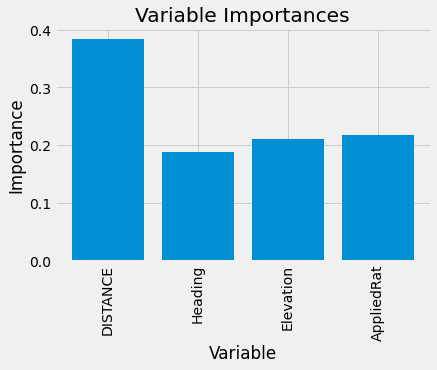

In [12]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

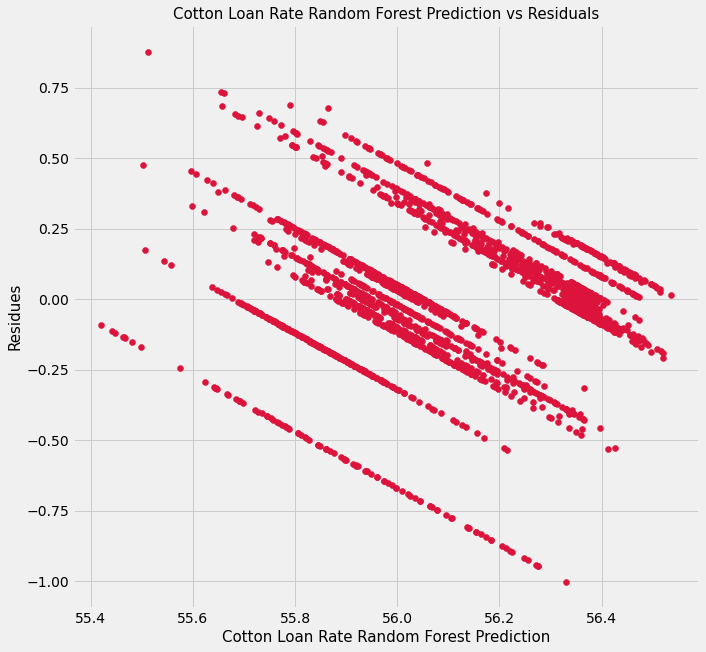

In [13]:
# Plot actual data and predictions 

plt.figure(figsize=(10,10))
plt.scatter(predictions, (test_y1-predictions), c='crimson')

#plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Cotton Loan Rate Random Forest Prediction vs Residuals', fontsize=15)
plt.xlabel('Cotton Loan Rate Random Forest Prediction', fontsize=15)
plt.ylabel('Residues', fontsize=15)
plt.show()

In [14]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# TOOK 1h 10mins to tune the model 
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=0, random_state=42, 
                               n_jobs = None)
# Fit the random search model
rf_random.fit(train_x, train_y1)
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [17]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_x, train_y1)
base_accuracy = evaluate(base_model, test_x, test_y1)

Model Performance
Average Error: 0.1541.
Accuracy = 99.72%.


In [19]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_x, test_y1)

print('Training Coefficient of R^2 : %.3f'%best_random.score(train_x, train_y1))
print('Test Coefficient of R^2 : %.3f'%best_random.score(test_x, test_y1))

Model Performance
Average Error: 0.1585.
Accuracy = 99.72%.
Training Coefficient of R^2 : 0.755
Test Coefficient of R^2 : 0.446


In [20]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.01%.


In [21]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, None],
    'max_features': ['sqrt','log2', 'auto', None],
    'min_samples_leaf': [1,2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1000, 1500, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_x, train_y1)
grid_search.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.4min
